##PORTFOLIO DOWNFALLS O LIMITES DE DIFERSIFICACIÓN

Instrucciones generales para la entrega de proyecto
1. Aspectos generales
A continuación, se presentan las instrucciones para la entrega del proyecto final. Es necesario
apegarse a los reglamentos institucionales de no plagio y realizar referencias precisas. El uso de
ChatGPT debe ser moderado y es necesario avisar al tutor en qué caso se usará. De no ser así, el
alumno tendrá qué defender el código.
La entrega del proyecto será en una carpeta que contenga:
(1) La presentación que se expondrá ante el grupo (en extensión .pdf) de no más de 10 diapositivas.
(2) Un trabajo escrito (ver siguiente sección).
(3) El código completo documentado. Se debe entregar el extensión .ipynb
2. Trabajo escrito
(1) El trabajo debe contener una hoja de presentación y referencias.
(2) La estructura del trabajo escrito debe ser como sigue:
• Presentación del problema, historia e importancia.
• ¿Qué se busca resolver y cuáles serán las técnicas a usar?
• Descripción precisa del modelo matemático.
• Realizar un Estudio Descriptivo de los Datos (EDA).
• Resultados (usar visualización de datos como histogramas, barras, etcétera).
• Conclusiones sobre el modelo, las técnicas usadas y progresos.

[*********************100%%**********************]  5 of 5 completed


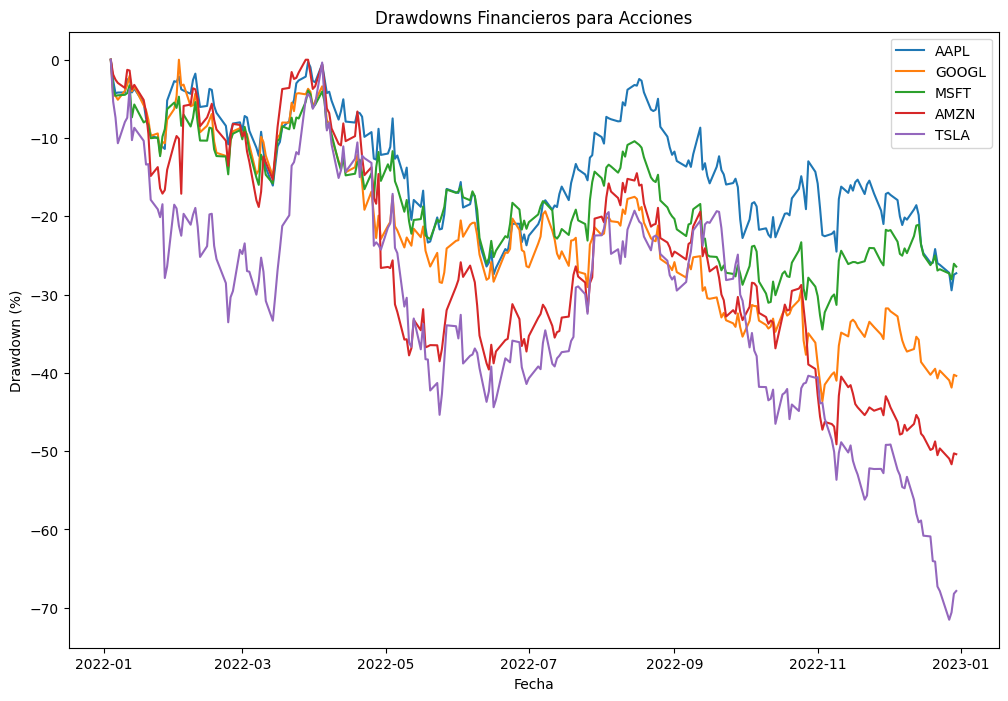

Máximo Drawdown por Acción:
AAPL    -29.453803
GOOGL   -43.628378
MSFT    -34.454939
AMZN    -51.675871
TSLA    -71.528979
dtype: float64

Duración del Máximo Drawdown:
1 days 10:39:21.600000


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Descargar datos de Yahoo Finance
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']
data = yf.download(tickers, start='2022-01-01', end='2023-01-01')['Adj Close']

# Calcular el drawdown para cada acción
drawdowns = pd.DataFrame(index=data.index)

for ticker in tickers:
    returns = data[ticker].pct_change().dropna()
    wealth_index = 1000 * (1 + returns).cumprod()
    drawdowns[ticker] = (wealth_index - wealth_index.cummax()) / wealth_index.cummax() * 100

# Calcular el drawdown máximo y su duración
max_drawdown = drawdowns.min()
max_drawdown_duration = (drawdowns[drawdowns == max_drawdown].count() * drawdowns.index.to_series().diff().mean()).max()

# Visualizar los drawdowns
plt.figure(figsize=(12, 8))
for ticker in tickers:
    plt.plot(drawdowns.index, drawdowns[ticker], label=f'{ticker}')

plt.title('Drawdowns Financieros para Acciones')
plt.xlabel('Fecha')
plt.ylabel('Drawdown (%)')
plt.legend()
plt.show()

# Imprimir el máximo drawdown y su duración
print("Máximo Drawdown por Acción:")
print(max_drawdown)
print("\nDuración del Máximo Drawdown:")
print(max_drawdown_duration)



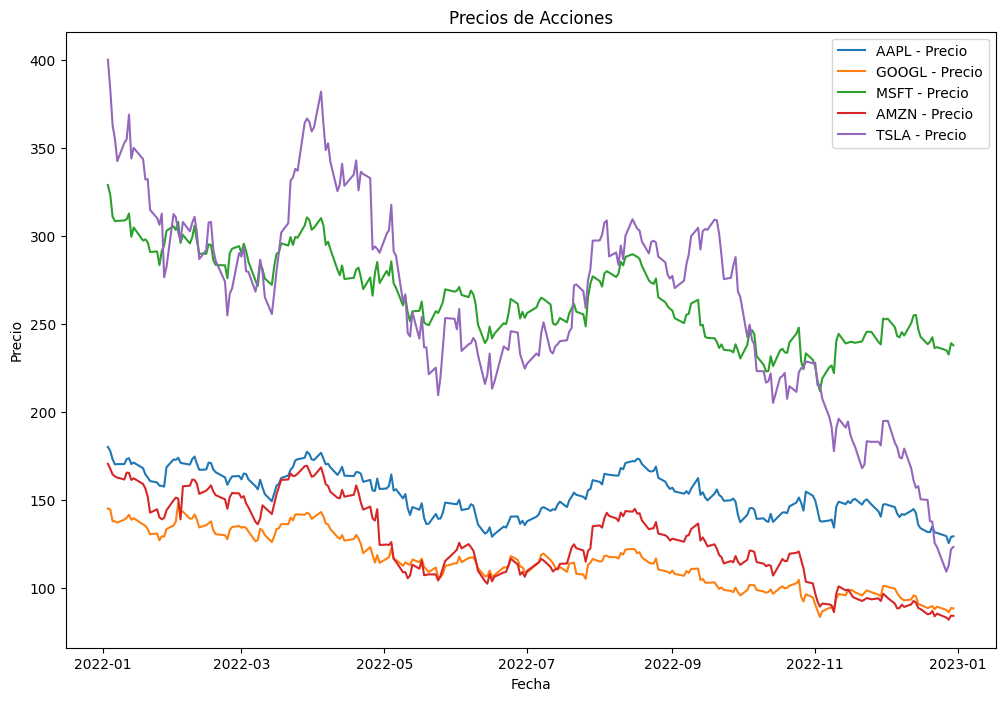

In [ ]:
# Visualizar los precios de las acciones
plt.figure(figsize=(12, 8))
for ticker in tickers:
    plt.plot(data.index, data[ticker], label=f'{ticker} - Precio')

plt.title('Precios de Acciones')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()



